In [167]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA

In [168]:
df = pd.read_csv("https://raw.githubusercontent.com/codeheroku/Introduction-to-Machine-Learning/master/Face%20Recognition%20Using%20PCA/face_data.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,target
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669422,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0


In [169]:
x = df.iloc[:,:4096]
y = df.iloc[:,4096:]

In [170]:
print("Dimension of each image:",np.array(x.iloc[0]).reshape(1,4096).shape)
print("Dimension of dataset",x.shape)

Dimension of each image: (1, 4096)
Dimension of dataset (400, 4096)


In [171]:
print(y.target.unique())
print("No of classes in dataset:",len(y.target.unique()))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
No of classes in dataset: 40


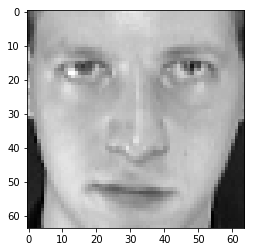

In [172]:
#Sample image
plt.imshow(np.array(x.iloc[2]).reshape(64, 64), cmap='gray')

In [173]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 23)

In [194]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
332,0.425620,0.475207,0.458678,0.500000,0.524793,0.524793,0.541322,0.557851,0.586777,0.553719,...,0.388430,0.491736,0.690083,0.661157,0.669422,0.524793,0.433884,0.491736,0.483471,0.483471
61,0.305785,0.305785,0.549587,0.665289,0.657025,0.673554,0.677686,0.739669,0.752066,0.727273,...,0.417355,0.471074,0.438017,0.450413,0.561983,0.400826,0.276859,0.223141,0.243802,0.223141
185,0.252066,0.231405,0.276859,0.417355,0.433884,0.669422,0.834711,0.859504,0.871901,0.871901,...,0.516529,0.508265,0.268595,0.140496,0.165289,0.169422,0.173554,0.181818,0.173554,0.177686
75,0.351240,0.433884,0.553719,0.648760,0.706612,0.752066,0.789256,0.818182,0.818182,0.830578,...,0.561983,0.553719,0.561983,0.545455,0.528926,0.351240,0.115702,0.157025,0.210744,0.206612
135,0.648760,0.632231,0.702479,0.714876,0.760331,0.776860,0.789256,0.801653,0.809917,0.805785,...,0.227273,0.214876,0.177686,0.115702,0.099174,0.119835,0.078512,0.095041,0.078512,0.078512


In [175]:
x_train.T.shape

(4096, 300)

In [176]:
avg_face = []

for index,col in x_train.T.iterrows():
    avg_face.append(np.mean(col))

In [177]:
avg_face = np.array(avg_face)

In [178]:
avg_face = avg_face.reshape(1,4096)

In [179]:
avg_face.shape

(1, 4096)

In [195]:
x_train = x_train.sub(avg_face.squeeze(), axis=1)

In [196]:
pca = PCA(n_components=121).fit(x_train)

In [197]:
pca

PCA(copy=True, iterated_power='auto', n_components=121, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [198]:
def show_eigenfaces(pca):

    fig, axes = plt.subplots(4, 8, figsize=(12, 8),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()

In [200]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
332,0.017287,0.035482,-0.019036,-0.018168,-0.028843,-0.062410,-0.079656,-0.090909,-0.080868,-0.127397,...,0.025165,0.121901,0.323554,0.301309,0.327190,0.184697,0.090413,0.165785,0.164835,0.167066
61,-0.102548,-0.133939,0.071873,0.147121,0.103388,0.086350,0.056708,0.090909,0.084422,0.046157,...,0.054091,0.101240,0.071488,0.090565,0.219752,0.060730,-0.066612,-0.102810,-0.074835,-0.093264
185,-0.156267,-0.208320,-0.200854,-0.100813,-0.119752,0.082218,0.213733,0.210744,0.204256,0.190785,...,0.153264,0.138430,-0.097934,-0.219353,-0.176942,-0.170675,-0.169917,-0.144132,-0.145083,-0.138719
75,-0.057094,-0.005840,0.076006,0.130592,0.152975,0.164862,0.168278,0.169421,0.150537,0.149463,...,0.198719,0.183884,0.195455,0.185606,0.186694,0.011143,-0.227769,-0.168926,-0.107893,-0.109793
135,0.240427,0.192507,0.224766,0.196708,0.206694,0.189656,0.168278,0.152893,0.142273,0.124669,...,-0.135992,-0.154959,-0.188843,-0.244146,-0.243058,-0.220262,-0.264959,-0.230909,-0.240124,-0.237893


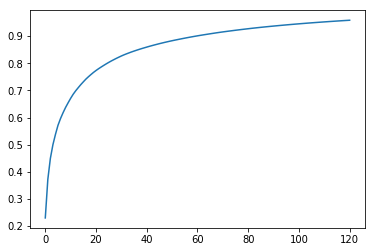

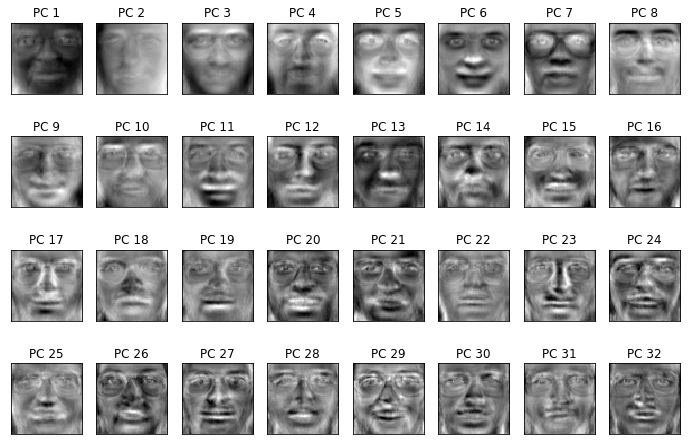

In [201]:
Xtrain_pca = pca.transform(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
show_eigenfaces(pca)

In [202]:
Xtrain_pca.shape

(300, 121)

In [203]:
def show_orignal_images(pixels):
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(11, 11), cmap='gray')
    plt.show()

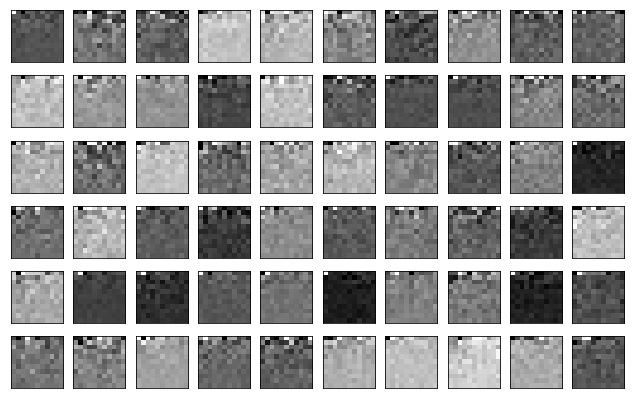

In [204]:
show_orignal_images(Xtrain_pca)